# Comment Graph Analysis

In [1]:
import matplotlib.font_manager as font_manager
from os.path import expanduser
import matplotlib as mpl
import seaborn as sns

sns.set_style("ticks")
fontpath = expanduser('~/.local/share/fonts/LinLibertine_DRah.ttf')
prop = font_manager.FontProperties(fname=fontpath)

params = {
    "axes.titlesize" : 16,
    'axes.labelsize': 12,
    'font.size': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'font.family': prop.get_name(),
    'text.usetex': True
}
mpl.rcParams.update(params)


In [2]:
# Read channels
from helpers import bins_y_s, bins_t_s, colors, mean_confidence_interval, _jaccard
from sqlitedict import SqliteDict
import matplotlib.colors as cl
import networkx as nx
import pandas as pd
import numpy as np
import itertools

def get_year(years_ts, years_nm, ts):
    for idx, (lower, upper) in enumerate(years_ts):
        if lower <= ts < upper:
            return years_nm[idx]
    return "Other"

cats = ["Alt-right", "Alt-lite", "Intellectual Dark Web"]
df_sources = pd.read_csv("../data/sources_final.csv")
df_sources = df_sources.set_index("Name")
channels_dict = SqliteDict("../data/channel_dict.sqlite", tablename="channels", flag="r")
df_important = pd.read_csv("../data/important_channels.csv")

## Optional: Recreate Graph

In [3]:
G = nx.MultiGraph()

for _, v in list(df_important.iterrows()):
    d = dict(df_sources.loc[v["name"]])
    G.add_node(v["name"], category=d["Category"], pos=v["pos"])

for i, j in list(itertools.combinations([tuple(v) for _, v in df_important.iterrows()], 2)):
    print(i, j)
    d_i = dict(df_sources.loc[i[1]])
    d_j = dict(df_sources.loc[j[1]])
    years_user_i = [(get_year(bins_y_s, bins_t_s, v["timestamp"]), v["user_id"]) for v in channels_dict[d_i["Id"]]]
    years_user_j = [(get_year(bins_y_s, bins_t_s, v["timestamp"]), v["user_id"]) for v in channels_dict[d_j["Id"]]]

    for year in bins_t_s:
        years_tmp_i = set([u for y, u in years_user_i if y == year])
        years_tmp_j = set([u for y, u in years_user_j if y == year])
        try:
            similarity = _jaccard(years_tmp_i, years_tmp_j)
        except ZeroDivisionError:
            similarity = 0.0
        G.add_edge(i[1], j[1], year=year, weight=similarity)
        print(year, similarity)
nx.write_graphml(G, "../data/important_channels_intersection.graphml")

('Alt-right', 'James Allsup', 1) ('Alt-right', 'Black Pigeon Speaks', 2)
2006-2012 0.0
2013-2015 0.0
2016 0.026804617904366237
2017 0.06372810820183804
2018 0.10233494797963852
('Alt-right', 'James Allsup', 1) ('Alt-right', 'ThuleanPerspective', 3)
2006-2012 0.0
2013-2015 0.0
2016 0.004968679573403368
2017 0.014005676778428242
2018 0.0144828579258578
('Alt-right', 'James Allsup', 1) ('Alt-right', 'Red Ice TV', 4)
2006-2012 0.0
2013-2015 0.0
2016 0.013812376854718726
2017 0.05766970150973839
2018 0.0816545574636724
('Alt-right', 'James Allsup', 1) ('Alt-right', 'The Golden One', 5)
2006-2012 0.0
2013-2015 0.0
2016 0.0055291492870307496
2017 0.018916468082414224
2018 0.018769945329754165
('Alt-right', 'James Allsup', 1) ('Alt-right', 'AmRenVideos', 6)
2006-2012 0.0
2013-2015 0.0
2016 0.00868093871845803
2017 0.031277869792330236
2018 0.05737008226259413
('Alt-right', 'James Allsup', 1) ('Alt-right', 'NeatoBurrito Productions', 7)
2006-2012 0.0
2013-2015 0.0
2016 0.011398807277119347
2017

2018 0.0035262215839058533
('Alt-right', 'Black Pigeon Speaks', 2) ('Alt-right', 'ThuleanPerspective', 3)
2006-2012 0.0
2013-2015 0.006975907946781733
2016 0.028946824905072843
2017 0.03725192717730031
2018 0.027495793606281547
('Alt-right', 'Black Pigeon Speaks', 2) ('Alt-right', 'Red Ice TV', 4)
2006-2012 0.0
2013-2015 0.02516395779868834
2016 0.06840242300394103
2017 0.1199769759326546
2018 0.13279761042319138
('Alt-right', 'Black Pigeon Speaks', 2) ('Alt-right', 'The Golden One', 5)
2006-2012 0.0
2013-2015 0.023339455157636975
2016 0.03391773853947341
2017 0.047718831559927725
2018 0.039175137864593715
('Alt-right', 'Black Pigeon Speaks', 2) ('Alt-right', 'AmRenVideos', 6)
2006-2012 0.0
2013-2015 0.03182773109243697
2016 0.0335025593689687
2017 0.05722808165731115
2018 0.0923202170963365
('Alt-right', 'Black Pigeon Speaks', 2) ('Alt-right', 'NeatoBurrito Productions', 7)
2006-2012 0.0
2013-2015 0.0010498687664041995
2016 0.016426543274792302
2017 0.025455783342159012
2018 0.0183525

2006-2012 0.0
2013-2015 0.0
2016 2.3462061845995027e-05
2017 0.03180509564287259
2018 0.024288748687254724
('Alt-right', 'Black Pigeon Speaks', 2) ('Intellectual Dark Web', 'Ben Shapiro', 14)
2006-2012 0.0
2013-2015 0.0
2016 0.007667203147353362
2017 0.011782032400589101
2018 0.025505900855481357
('Alt-right', 'Black Pigeon Speaks', 2) ('Intellectual Dark Web', 'YAFTV', 15)
2006-2012 0.0
2013-2015 0.017658930373360242
2016 0.017669003402615506
2017 0.010864549134396054
2018 0.03819422259138571
('Alt-right', 'Black Pigeon Speaks', 2) ('Intellectual Dark Web', 'joerogandotnet', 16)
2006-2012 0.0
2013-2015 0.003790699248629256
2016 0.0015998962229477006
2017 0.002141929610838164
2018 0.002902303594859273
('Alt-right', 'ThuleanPerspective', 3) ('Alt-right', 'Red Ice TV', 4)
2006-2012 0.0
2013-2015 0.01401896683748601
2016 0.041093643198906356
2017 0.05252530227289517
2018 0.03737300991403748
('Alt-right', 'ThuleanPerspective', 3) ('Alt-right', 'The Golden One', 5)
2006-2012 0.0
2013-2015 0

2016 0.0
2017 0.0006304573968414084
2018 0.011331014145309725
('Alt-right', 'ThuleanPerspective', 3) ('Intellectual Dark Web', 'Owen Benjamin', 11)
2006-2012 0.0
2013-2015 0.0
2016 4.470672389127325e-05
2017 0.005803416496355994
2018 0.014145093175502771
('Alt-right', 'ThuleanPerspective', 3) ('Intellectual Dark Web', 'AgatanFoundation', 12)
2006-2012 0.0
2013-2015 0.001327580484566877
2016 0.001566579634464752
2017 0.0006238488503356901
2018 0.0022521670010219918
('Alt-right', 'ThuleanPerspective', 3) ('Intellectual Dark Web', 'Essential Truth', 13)
2006-2012 0.0
2013-2015 0.0
2016 0.0
2017 0.009996283182378373
2018 0.007100167733320306
('Alt-right', 'ThuleanPerspective', 3) ('Intellectual Dark Web', 'Ben Shapiro', 14)
2006-2012 0.0
2013-2015 0.0
2016 0.001669449081803005
2017 0.0023152231434115365
2018 0.0032502592723268223
('Alt-right', 'ThuleanPerspective', 3) ('Intellectual Dark Web', 'YAFTV', 15)
2006-2012 0.0
2013-2015 0.0010100082637039757
2016 0.0031985142385472553
2017 0.0021

2017 0.03373118255446122
2018 0.01855556989802504
('Alt-right', 'Red Ice TV', 4) ('Intellectual Dark Web', 'Timcast', 10)
2006-2012 0.0
2013-2015 0.0
2016 0.0
2017 0.0011813885859687386
2018 0.06732519995577015
('Alt-right', 'Red Ice TV', 4) ('Intellectual Dark Web', 'Owen Benjamin', 11)
2006-2012 0.0
2013-2015 0.0
2016 0.0001856665428889714
2017 0.022450610012051293
2018 0.05897833170042607
('Alt-right', 'Red Ice TV', 4) ('Intellectual Dark Web', 'AgatanFoundation', 12)
2006-2012 0.0
2013-2015 0.006554920872740893
2016 0.0038414782397276927
2017 0.002003127690604628
2018 0.00987117745098942
('Alt-right', 'Red Ice TV', 4) ('Intellectual Dark Web', 'Essential Truth', 13)
2006-2012 0.0
2013-2015 0.0
2016 0.0
2017 0.023368823368823368
2018 0.019003661492444947
('Alt-right', 'Red Ice TV', 4) ('Intellectual Dark Web', 'Ben Shapiro', 14)
2006-2012 0.0
2013-2015 0.0
2016 0.006567425569176883
2017 0.009449049959650796
2018 0.018489202792661145
('Alt-right', 'Red Ice TV', 4) ('Intellectual Dark

2006-2012 0.0
2013-2015 0.0
2016 0.0
2017 0.0018531717747683535
2018 0.016217177518973714
('Alt-right', 'The Golden One', 5) ('Intellectual Dark Web', 'Owen Benjamin', 11)
2006-2012 0.0
2013-2015 0.00012461059190031152
2016 0.0005558643690939411
2017 0.011025099695050434
2018 0.01784263719656182
('Alt-right', 'The Golden One', 5) ('Intellectual Dark Web', 'AgatanFoundation', 12)
2006-2012 0.0
2013-2015 0.003821281599059377
2016 0.002230419490434932
2017 0.001439929881675327
2018 0.0043014178747809466
('Alt-right', 'The Golden One', 5) ('Intellectual Dark Web', 'Essential Truth', 13)
2006-2012 0.0
2013-2015 0.0
2016 0.0
2017 0.015041866028708134
2018 0.01227577913618599
('Alt-right', 'The Golden One', 5) ('Intellectual Dark Web', 'Ben Shapiro', 14)
2006-2012 0.0
2013-2015 0.0
2016 0.003724989357173265
2017 0.005212480996163035
2018 0.00545795430872856
('Alt-right', 'The Golden One', 5) ('Intellectual Dark Web', 'YAFTV', 15)
2006-2012 0.0
2013-2015 0.004203323558162268
2016 0.00690448791

2018 0.0418279814772641
('Alt-right', 'AmRenVideos', 6) ('Intellectual Dark Web', 'AgatanFoundation', 12)
2006-2012 0.0
2013-2015 0.005162285646472438
2016 0.004157452454666077
2017 0.003161863067007175
2018 0.011013215859030838
('Alt-right', 'AmRenVideos', 6) ('Intellectual Dark Web', 'Essential Truth', 13)
2006-2012 0.0
2013-2015 0.0
2016 0.0
2017 0.019173299405272657
2018 0.021368298537862807
('Alt-right', 'AmRenVideos', 6) ('Intellectual Dark Web', 'Ben Shapiro', 14)
2006-2012 0.0
2013-2015 0.0
2016 0.005858295567591466
2017 0.008777563690858489
2018 0.016371706923387328
('Alt-right', 'AmRenVideos', 6) ('Intellectual Dark Web', 'YAFTV', 15)
2006-2012 0.002031488065007618
2013-2015 0.012652507907817443
2016 0.015452046653294704
2017 0.014393488187413143
2018 0.03935307660408117
('Alt-right', 'AmRenVideos', 6) ('Intellectual Dark Web', 'joerogandotnet', 16)
2006-2012 0.0005136693111123795
2013-2015 0.003049914453618984
2016 0.0017424975798644724
2017 0.0033931168201648087
2018 0.0038

2006-2012 0.0
2013-2015 0.0
2016 0.0
2017 0.011394379197300996
2018 0.008891308292505897
('Alt-right', 'NeatoBurrito Productions', 7) ('Intellectual Dark Web', 'Ben Shapiro', 14)
2006-2012 0.0
2013-2015 0.0
2016 0.005544603252833909
2017 0.0056164329759239625
2018 0.00566293241413271
('Alt-right', 'NeatoBurrito Productions', 7) ('Intellectual Dark Web', 'YAFTV', 15)
2006-2012 0.0
2013-2015 0.0007636502481863307
2016 0.009036144578313253
2017 0.0069129646418857665
2018 0.007615700058582308
('Alt-right', 'NeatoBurrito Productions', 7) ('Intellectual Dark Web', 'joerogandotnet', 16)
2006-2012 0.0
2013-2015 0.00021321961620469082
2016 0.0026641091219096334
2017 0.003583778685947815
2018 0.0042158516020236085
('Alt-right', 'The Last Stand', 8) ('Alt-right', 'MillennialWoes', 9)
2006-2012 0.0
2013-2015 0.0003324468085106383
2016 0.017538577342867897
2017 0.03733542935743761
2018 0.006802212587830767
('Alt-right', 'The Last Stand', 8) ('Alt-right', 'Mark Collett', 10)
2006-2012 0.0
2013-2015 

2006-2012 0.0
2013-2015 0.0
2016 0.011102299762093577
2017 0.08356909684439608
2018 0.03345662642194152
('Alt-right', 'MillennialWoes', 9) ('Alt-right', 'AustralianRealist', 11)
2006-2012 0.0
2013-2015 0.028485561217823075
2016 0.023722397476340695
2017 0.040881482635103564
2018 0.030300651542507263
('Alt-right', 'MillennialWoes', 9) ('Alt-right', 'Jean-François Gariépy', 12)
2006-2012 0.0
2013-2015 0.003598298985933922
2016 0.0013930348258706469
2017 0.11840270131395435
2018 0.11216490323995396
('Alt-right', 'MillennialWoes', 9) ('Alt-right', 'Prince of Zimbabwe', 13)
2006-2012 0.0
2013-2015 0.0
2016 0.0
2017 0.0
2018 0.009046413502109704
('Alt-right', 'MillennialWoes', 9) ('Alt-right', 'The Alternative Hypothesis', 14)
2006-2012 0.0
2013-2015 0.011444356748224152
2016 0.03172147001934236
2017 0.13872949436305948
2018 0.07432298873295118
('Alt-right', 'MillennialWoes', 9) ('Alt-right', 'Matthew North', 15)
2006-2012 0.0
2013-2015 0.0
2016 0.0017627357659086903
2017 0.00745614035087719

2006-2012 0.0
2013-2015 0.0
2016 0.0
2017 0.041281861839674916
2018 0.07421496388781774
('Alt-right', 'Mark Collett', 10) ('Alt-lite', 'StevenCrowder', 1)
2006-2012 0.0
2013-2015 0.0
2016 0.0005082788683060501
2017 0.006152304246237072
2018 0.033494896770284756
('Alt-right', 'Mark Collett', 10) ('Alt-lite', 'Rebel Media', 2)
2006-2012 0.0
2013-2015 0.0
2016 0.0006922953016454008
2017 0.012509384111920829
2018 0.08948149103572811
('Alt-right', 'Mark Collett', 10) ('Alt-lite', 'Paul Joseph Watson', 3)
2006-2012 0.0
2013-2015 0.0
2016 0.000893773087303579
2017 0.012632993819732355
2018 0.08777606380977464
('Alt-right', 'Mark Collett', 10) ('Alt-lite', 'MarkDice', 4)
2006-2012 0.0
2013-2015 0.0
2016 0.0006521203572653454
2017 0.008965480455519304
2018 0.05813843386042988
('Alt-right', 'Mark Collett', 10) ('Alt-lite', 'Stefan Molyneux', 5)
2006-2012 0.0
2013-2015 0.0
2016 0.0011165176719097733
2017 0.01821825972769369
2018 0.09133130951454295
('Alt-right', 'Mark Collett', 10) ('Alt-lite', '

2016 0.00901817328194996
2017 0.0121371291609827
2018 0.011838292158512438
('Alt-right', 'AustralianRealist', 11) ('Alt-lite', 'OneTruth4Life', 9)
2006-2012 0.0
2013-2015 0.00525067214929622
2016 0.004822235441531977
2017 0.005666505970774422
2018 0.00910286617272736
('Alt-right', 'AustralianRealist', 11) ('Alt-lite', 'No Bullshit', 10)
2006-2012 0.0
2013-2015 0.0
2016 0.0057656496203982235
2017 0.005626260484519154
2018 0.0059965186174351405
('Alt-right', 'AustralianRealist', 11) ('Alt-lite', 'SJWCentral', 11)
2006-2012 0.0
2013-2015 0.0
2016 0.00655002866723422
2017 0.005910307096361966
2018 0.008528694475379562
('Alt-right', 'AustralianRealist', 11) ('Alt-lite', 'Computing Forever', 12)
2006-2012 0.0
2013-2015 0.004823012660408234
2016 0.008035487037777697
2017 0.010926535872834025
2018 0.011297695075696178
('Alt-right', 'AustralianRealist', 11) ('Alt-lite', 'The Thinkery', 13)
2006-2012 0.0
2013-2015 0.0
2016 0.008189605278388702
2017 0.011182916549592583
2018 0.010697834227245993


2006-2012 0.0
2013-2015 0.0
2016 0.0015853244253198958
2017 0.017792734633358044
2018 0.015834942575464986
('Alt-right', 'Jean-François Gariépy', 12) ('Alt-lite', 'RobinHoodUKIP', 15)
2006-2012 0.0
2013-2015 0.0002816372512204281
2016 0.00026594458681881923
2017 0.010567270281953985
2018 0.011332071143295422
('Alt-right', 'Jean-François Gariépy', 12) ('Alt-lite', 'patcondell', 16)
2006-2012 0.0
2013-2015 0.0012966689023027052
2016 0.0007451217808410562
2017 0.011917558536243399
2018 0.011927468782584369
('Alt-right', 'Jean-François Gariépy', 12) ('Intellectual Dark Web', 'PowerfulJRE', 1)
2006-2012 0.0
2013-2015 0.0010348905972797163
2016 0.0005268058414191904
2017 0.006867500837025329
2018 0.0083113451245515
('Alt-right', 'Jean-François Gariépy', 12) ('Intellectual Dark Web', 'JRE Clips', 2)
2006-2012 0.0
2013-2015 0.0
2016 0.0006951685783802572
2017 0.006317916392745273
2018 0.006643138354122339
('Alt-right', 'Jean-François Gariépy', 12) ('Intellectual Dark Web', 'PragerUniversity', 

2006-2012 0.0
2013-2015 0.0
2016 0.0
2017 0.0
2018 0.0032248528660879846
('Alt-right', 'Prince of Zimbabwe', 13) ('Intellectual Dark Web', 'Essential Truth', 13)
2006-2012 0.0
2013-2015 0.0
2016 0.0
2017 0.0
2018 0.010340153899965022
('Alt-right', 'Prince of Zimbabwe', 13) ('Intellectual Dark Web', 'Ben Shapiro', 14)
2006-2012 0.0
2013-2015 0.0
2016 0.0
2017 0.0
2018 0.008120754327846454
('Alt-right', 'Prince of Zimbabwe', 13) ('Intellectual Dark Web', 'YAFTV', 15)
2006-2012 0.0
2013-2015 0.0
2016 0.0
2017 0.0
2018 0.009948646951818284
('Alt-right', 'Prince of Zimbabwe', 13) ('Intellectual Dark Web', 'joerogandotnet', 16)
2006-2012 0.0
2013-2015 0.0
2016 0.0
2017 0.0
2018 0.0027021082728500958
('Alt-right', 'The Alternative Hypothesis', 14) ('Alt-right', 'Matthew North', 15)
2006-2012 0.0
2013-2015 0.0
2016 0.0005780346820809249
2017 0.006846730281955901
2018 0.015206234556168029
('Alt-right', 'The Alternative Hypothesis', 14) ('Alt-right', 'Faith J Goldy', 16)
2006-2012 0.0
2013-2015 

2016 0.0013576211314388147
2017 0.007927640803536057
2018 0.0048059123652634435
('Alt-right', 'Matthew North', 15) ('Alt-lite', 'MarkDice', 4)
2006-2012 0.0
2013-2015 0.0
2016 0.0014365807449972763
2017 0.007560089374335923
2018 0.004491608892772419
('Alt-right', 'Matthew North', 15) ('Alt-lite', 'Stefan Molyneux', 5)
2006-2012 0.0
2013-2015 0.0
2016 0.0016533148963672163
2017 0.009765114830516989
2018 0.007854488133336052
('Alt-right', 'Matthew North', 15) ('Alt-lite', 'hOrnsticles3', 6)
2006-2012 0.0
2013-2015 0.0
2016 0.0006386186914229962
2017 0.0032527452246931808
2018 0.0024091256518668303
('Alt-right', 'Matthew North', 15) ('Alt-lite', 'MILO', 7)
2006-2012 0.0
2013-2015 0.0
2016 0.0007848472164085392
2017 0.004420492138556595
2018 0.004630116805219404
('Alt-right', 'Matthew North', 15) ('Alt-lite', 'Styxhexenhammer666', 8)
2006-2012 0.0
2013-2015 0.0
2016 0.0021817588646697796
2017 0.008942020322773461
2018 0.007891837414483743
('Alt-right', 'Matthew North', 15) ('Alt-lite', 'On

2006-2012 0.0
2013-2015 0.0
2016 0.0
2017 0.00600459022168802
2018 0.02849977539321063
('Alt-right', 'Faith J Goldy', 16) ('Intellectual Dark Web', 'SargonofAkkad100', 4)
2006-2012 0.0
2013-2015 0.0
2016 0.0
2017 0.010710028747049337
2018 0.046641536427082304
('Alt-right', 'Faith J Goldy', 16) ('Intellectual Dark Web', 'The Daily Wire', 5)
2006-2012 0.0
2013-2015 0.0
2016 0.0
2017 0.009512940835810219
2018 0.03209874475118377
('Alt-right', 'Faith J Goldy', 16) ('Intellectual Dark Web', 'The Rubin Report', 6)
2006-2012 0.0
2013-2015 0.0
2016 0.0
2017 0.012276689764266923
2018 0.0353428988725938
('Alt-right', 'Faith J Goldy', 16) ('Intellectual Dark Web', 'ReasonTV', 7)
2006-2012 0.0
2013-2015 0.0
2016 0.0
2017 0.009633475265592509
2018 0.033170806887758676
('Alt-right', 'Faith J Goldy', 16) ('Intellectual Dark Web', 'JordanPetersonVideos', 8)
2006-2012 0.0
2013-2015 0.0
2016 0.0
2017 0.014203634030390527
2018 0.03347465030945659
('Alt-right', 'Faith J Goldy', 16) ('Intellectual Dark Web

2006-2012 0.008702111853974319
2013-2015 0.006836654897035475
2016 0.003123486551050504
2017 0.002899261263387899
2018 0.0026954847319333813
('Alt-lite', 'Rebel Media', 2) ('Alt-lite', 'Paul Joseph Watson', 3)
2006-2012 0.0
2013-2015 0.0960828708682096
2016 0.15393827421562845
2017 0.13695592807590262
2018 0.15240923479041407
('Alt-lite', 'Rebel Media', 2) ('Alt-lite', 'MarkDice', 4)
2006-2012 0.0
2013-2015 0.03808910315019533
2016 0.13525861145733406
2017 0.11843487523270188
2018 0.12830204645783677
('Alt-lite', 'Rebel Media', 2) ('Alt-lite', 'Stefan Molyneux', 5)
2006-2012 0.0
2013-2015 0.07794244943997063
2016 0.11267073113096082
2017 0.11029059849136602
2018 0.11237137045309509
('Alt-lite', 'Rebel Media', 2) ('Alt-lite', 'hOrnsticles3', 6)
2006-2012 0.0
2013-2015 0.04042029433391234
2016 0.08372819983309523
2017 0.05032712927550185
2018 0.0578674184539179
('Alt-lite', 'Rebel Media', 2) ('Alt-lite', 'MILO', 7)
2006-2012 0.0
2013-2015 0.006257631257631258
2016 0.05350830809658863
201

2017 0.02723635070247199
2018 0.034136757415243454
('Alt-lite', 'Paul Joseph Watson', 3) ('Intellectual Dark Web', 'PowerfulJRE', 1)
2006-2012 0.007441808415398389
2013-2015 0.030165093047464252
2016 0.041809425561369844
2017 0.03802606043803715
2018 0.047492147963067374
('Alt-lite', 'Paul Joseph Watson', 3) ('Intellectual Dark Web', 'JRE Clips', 2)
2006-2012 0.0
2013-2015 0.0
2016 0.009936731947222117
2017 0.051220083226970976
2018 0.06719892536745777
('Alt-lite', 'Paul Joseph Watson', 3) ('Intellectual Dark Web', 'PragerUniversity', 3)
2006-2012 0.0006092916984006092
2013-2015 0.05918641490305411
2016 0.07309034632972015
2017 0.07988272728240164
2018 0.10953975163110878
('Alt-lite', 'Paul Joseph Watson', 3) ('Intellectual Dark Web', 'SargonofAkkad100', 4)
2006-2012 0.0
2013-2015 0.1007828645486707
2016 0.12377733423023059
2017 0.10430319574933476
2018 0.13568519709280802
('Alt-lite', 'Paul Joseph Watson', 3) ('Intellectual Dark Web', 'The Daily Wire', 5)
2006-2012 0.0
2013-2015 0.007

2013-2015 0.0
2016 0.00439403180030446
2017 0.011985651709033216
2018 0.027980704331599635
('Alt-lite', 'MarkDice', 4) ('Intellectual Dark Web', 'YAFTV', 15)
2006-2012 0.0033820509723396547
2013-2015 0.005248008734274584
2016 0.01159648034988238
2017 0.008588269810364601
2018 0.041368460781443454
('Alt-lite', 'MarkDice', 4) ('Intellectual Dark Web', 'joerogandotnet', 16)
2006-2012 0.011094349110566346
2013-2015 0.005129496897112368
2016 0.002511042392303917
2017 0.0029766413860097857
2018 0.003453575969183476
('Alt-lite', 'Stefan Molyneux', 5) ('Alt-lite', 'hOrnsticles3', 6)
2006-2012 0.0
2013-2015 0.015751221859251943
2016 0.038074012646418576
2017 0.023761809332951616
2018 0.03077061747259445
('Alt-lite', 'Stefan Molyneux', 5) ('Alt-lite', 'MILO', 7)
2006-2012 0.0
2013-2015 0.00245920461026792
2016 0.05367224612629642
2017 0.07416583289659663
2018 0.08261326766983133
('Alt-lite', 'Stefan Molyneux', 5) ('Alt-lite', 'Styxhexenhammer666', 8)
2006-2012 0.006314953810623557
2013-2015 0.01

2018 0.03878764129002051
('Alt-lite', 'hOrnsticles3', 6) ('Intellectual Dark Web', 'SargonofAkkad100', 4)
2006-2012 0.0
2013-2015 0.03515367786061726
2016 0.07300782907643959
2017 0.039692342039026184
2018 0.043358845717215364
('Alt-lite', 'hOrnsticles3', 6) ('Intellectual Dark Web', 'The Daily Wire', 5)
2006-2012 0.0
2013-2015 0.007624150010302906
2016 0.023825343594519228
2017 0.03384079075103698
2018 0.0445136201816991
('Alt-lite', 'hOrnsticles3', 6) ('Intellectual Dark Web', 'The Rubin Report', 6)
2006-2012 0.0
2013-2015 0.027232618286931385
2016 0.04367913473110788
2017 0.027050921710673897
2018 0.03312214817975905
('Alt-lite', 'hOrnsticles3', 6) ('Intellectual Dark Web', 'ReasonTV', 7)
2006-2012 0.0
2013-2015 0.015691337157459042
2016 0.018701214771132273
2017 0.022977006592974053
2018 0.0318619381532459
('Alt-lite', 'hOrnsticles3', 6) ('Intellectual Dark Web', 'JordanPetersonVideos', 8)
2006-2012 0.0
2013-2015 0.00014887598630340925
2016 0.014008119423182645
2017 0.0159937275199

2006-2012 0.0
2013-2015 0.010599334073251943
2016 0.05338204518852197
2017 0.0464217254958575
2018 0.0350638514003773
('Alt-lite', 'Styxhexenhammer666', 8) ('Alt-lite', 'patcondell', 16)
2006-2012 0.003648147788795529
2013-2015 0.01212367306688323
2016 0.03710252644828723
2017 0.028222219655048925
2018 0.03090654716035343
('Alt-lite', 'Styxhexenhammer666', 8) ('Intellectual Dark Web', 'PowerfulJRE', 1)
2006-2012 0.0034554250172771253
2013-2015 0.004859849786461146
2016 0.02728657720407498
2017 0.0343974106746208
2018 0.04144690621840676
('Alt-lite', 'Styxhexenhammer666', 8) ('Intellectual Dark Web', 'JRE Clips', 2)
2006-2012 0.0
2013-2015 0.0
2016 0.013923575404403964
2017 0.04135045655197436
2018 0.04391911350698171
('Alt-lite', 'Styxhexenhammer666', 8) ('Intellectual Dark Web', 'PragerUniversity', 3)
2006-2012 0.0
2013-2015 0.005729178895959051
2016 0.02817596984859315
2017 0.03571554739110468
2018 0.05026291985169133
('Alt-lite', 'Styxhexenhammer666', 8) ('Intellectual Dark Web', 'S

2016 0.035836279143662865
2017 0.06597017814085143
2018 0.0860808776501409
('Alt-lite', 'No Bullshit', 10) ('Alt-lite', 'The Thinkery', 13)
2006-2012 0.0
2013-2015 0.0
2016 0.03467139794485104
2017 0.08158737100191055
2018 0.10193753068701136
('Alt-lite', 'No Bullshit', 10) ('Alt-lite', 'Bearing', 14)
2006-2012 0.0
2013-2015 0.0
2016 0.0496039965882783
2017 0.10254601108548601
2018 0.0825095322306178
('Alt-lite', 'No Bullshit', 10) ('Alt-lite', 'RobinHoodUKIP', 15)
2006-2012 0.0
2013-2015 9.942334460131238e-05
2016 0.0184914917401565
2017 0.03159649044743155
2018 0.03179093187970019
('Alt-lite', 'No Bullshit', 10) ('Alt-lite', 'patcondell', 16)
2006-2012 0.0
2013-2015 9.052231375033946e-05
2016 0.0143335774035368
2017 0.012176047926896316
2018 0.013429787350315251
('Alt-lite', 'No Bullshit', 10) ('Intellectual Dark Web', 'PowerfulJRE', 1)
2006-2012 0.0
2013-2015 4.2465549822706326e-05
2016 0.009130380979538692
2017 0.030128911591068105
2018 0.03863134209267891
('Alt-lite', 'No Bullshit

2016 0.039163737204004
2017 0.029798816264170806
2018 0.03833186218472803
('Alt-lite', 'Computing Forever', 12) ('Intellectual Dark Web', 'PowerfulJRE', 1)
2006-2012 0.0008606910119267183
2013-2015 0.007857201075882305
2016 0.027903922731508938
2017 0.023431702170223476
2018 0.028098087748080793
('Alt-lite', 'Computing Forever', 12) ('Intellectual Dark Web', 'JRE Clips', 2)
2006-2012 0.0
2013-2015 0.0
2016 0.010503159574697522
2017 0.029868610545905228
2018 0.03400820676323361
('Alt-lite', 'Computing Forever', 12) ('Intellectual Dark Web', 'PragerUniversity', 3)
2006-2012 8.762705923589205e-05
2013-2015 0.021817626043597042
2016 0.06023436889082521
2017 0.04459897778651464
2018 0.058917177770031914
('Alt-lite', 'Computing Forever', 12) ('Intellectual Dark Web', 'SargonofAkkad100', 4)
2006-2012 0.0
2013-2015 0.031811465108892295
2016 0.14024358211046126
2017 0.1373181216931217
2018 0.15164706548619108
('Alt-lite', 'Computing Forever', 12) ('Intellectual Dark Web', 'The Daily Wire', 5)
2

2006-2012 0.0
2013-2015 0.0
2016 0.024164109190760782
2017 0.044007297260085364
2018 0.04352406386127923
('Alt-lite', 'Bearing', 14) ('Intellectual Dark Web', 'JordanPetersonVideos', 8)
2006-2012 0.0
2013-2015 0.0
2016 0.04652077215143212
2017 0.04819171961181317
2018 0.04040081695174879
('Alt-lite', 'Bearing', 14) ('Intellectual Dark Web', 'Bite-sized Philosophy', 9)
2006-2012 0.0
2013-2015 0.0
2016 0.013503319251659625
2017 0.0305375909458367
2018 0.014194811551639746
('Alt-lite', 'Bearing', 14) ('Intellectual Dark Web', 'Timcast', 10)
2006-2012 0.0
2013-2015 0.0
2016 0.0
2017 0.0024823124426992336
2018 0.11015470697870346
('Alt-lite', 'Bearing', 14) ('Intellectual Dark Web', 'Owen Benjamin', 11)
2006-2012 0.0
2013-2015 0.0
2016 0.00022676471541028216
2017 0.027719144830081716
2018 0.04629695800281093
('Alt-lite', 'Bearing', 14) ('Intellectual Dark Web', 'AgatanFoundation', 12)
2006-2012 0.0
2013-2015 0.0
2016 0.0041235237936418905
2017 0.0017170592385437299
2018 0.008855931343707522

2006-2012 0.0
2013-2015 0.0
2016 0.03940250113073665
2017 0.16309486816660804
2018 0.19482733024769658
('Intellectual Dark Web', 'PowerfulJRE', 1) ('Intellectual Dark Web', 'PragerUniversity', 3)
2006-2012 0.00018953752843062926
2013-2015 0.016753684684631294
2016 0.02150670377686
2017 0.023519396136778545
2018 0.036762020380763274
('Intellectual Dark Web', 'PowerfulJRE', 1) ('Intellectual Dark Web', 'SargonofAkkad100', 4)
2006-2012 0.0
2013-2015 0.03646577398968498
2016 0.054536752094794236
2017 0.058374867083600006
2018 0.06048459736984327
('Intellectual Dark Web', 'PowerfulJRE', 1) ('Intellectual Dark Web', 'The Daily Wire', 5)
2006-2012 0.0
2013-2015 0.0035011980500702306
2016 0.02559449446430879
2017 0.054223954969087385
2018 0.08103476341474532
('Intellectual Dark Web', 'PowerfulJRE', 1) ('Intellectual Dark Web', 'The Rubin Report', 6)
2006-2012 0.0005448601525608427
2013-2015 0.045097215183614946
2016 0.06818275773685994
2017 0.07259458760158538
2018 0.06597529843351117
('Intell

2016 0.01264706645112769
2017 0.00897804623307934
2018 0.03902701481534327
('Intellectual Dark Web', 'PragerUniversity', 3) ('Intellectual Dark Web', 'joerogandotnet', 16)
2006-2012 0.00034934497816593884
2013-2015 0.003484401227064884
2016 0.0012843633164723995
2017 0.0014896062594388978
2018 0.002261048950609131
('Intellectual Dark Web', 'SargonofAkkad100', 4) ('Intellectual Dark Web', 'The Daily Wire', 5)
2006-2012 0.0
2013-2015 0.007498586332084935
2016 0.04582636597821666
2017 0.08897419081053971
2018 0.10708244996360411
('Intellectual Dark Web', 'SargonofAkkad100', 4) ('Intellectual Dark Web', 'The Rubin Report', 6)
2006-2012 0.0
2013-2015 0.09688458615934484
2016 0.12893257852894893
2017 0.11839402427637721
2018 0.10031275189424473
('Intellectual Dark Web', 'SargonofAkkad100', 4) ('Intellectual Dark Web', 'ReasonTV', 7)
2006-2012 0.0
2013-2015 0.0419888757381935
2016 0.03320286138480227
2017 0.046454386839481554
2018 0.06266189756364127
('Intellectual Dark Web', 'SargonofAkkad10

2017 0.00255835802558358
2018 0.010045171177098293
('Intellectual Dark Web', 'ReasonTV', 7) ('Intellectual Dark Web', 'Essential Truth', 13)
2006-2012 0.0
2013-2015 0.0
2016 0.0
2017 0.024440898317414875
2018 0.01996412813973376
('Intellectual Dark Web', 'ReasonTV', 7) ('Intellectual Dark Web', 'Ben Shapiro', 14)
2006-2012 0.0
2013-2015 0.0
2016 0.00552424529881145
2017 0.013857822984742649
2018 0.026896717344318623
('Intellectual Dark Web', 'ReasonTV', 7) ('Intellectual Dark Web', 'YAFTV', 15)
2006-2012 0.0072182248683938304
2013-2015 0.00947985770598981
2016 0.0188930148534725
2017 0.012598425196850394
2018 0.043658513030641666
('Intellectual Dark Web', 'ReasonTV', 7) ('Intellectual Dark Web', 'joerogandotnet', 16)
2006-2012 0.014143208526919923
2013-2015 0.00672748585698996
2016 0.0033365622645570984
2017 0.004213838244795909
2018 0.004443962714068936
('Intellectual Dark Web', 'JordanPetersonVideos', 8) ('Intellectual Dark Web', 'Bite-sized Philosophy', 9)
2006-2012 0.0
2013-2015 0.

In [99]:
G = nx.read_graphml("../data/important_channels_intersection.graphml")

In [118]:
# Creates dataframe with similarity distribution
df_list = []
for edge in G.edges:
    i_n, j_n = sorted([edge[0], edge[1]], key=lambda x:df_sources.loc[x]["Category"])
    i, j = sorted([df_sources.loc[edge[0]]["Category"], df_sources.loc[edge[1]]["Category"]])
    
#     if i == j:
#         continue
        
    if i == "Alt-right":
        nar = j_n
    elif j == "Alt-right":
        nar = i_n
    else:
        nar = None
        
    j = j.replace("Intellectual Dark Web", "I.D.W.")
    i = i.replace("Intellectual Dark Web", "I.D.W.")
    ge = G.edges[edge]
    df_list.append({"nar": nar, "kind": "{} {}".format(i,j), "year": ge["year"], "weight": ge["weight"]})
    
df_sims = pd.DataFrame(df_list)


# Gets position from file created in gephi
df_helper_pos = pd.read_csv("../data/helper_comments.csv")
pos = {k: np.array([i["x"], i["y"]]) for k, i in df_helper_pos[["x", "y"]].iterrows()}
df_helper_imp = df_important.set_index("name")

In [133]:
for idx, year in enumerate(bins_t_s[1:]):

    intervals = { k: dict(v["weight"]) for k, v in
                 df_sims[df_sims.year == year].groupby("kind").agg(mean_confidence_interval).iterrows()}
    print(year, "\n",intervals)

2013-2015 
 {'Alt-lite Alt-lite': {'mean': 0.013286325659723744, 'lower': 0.009991493798168386, 'upper': 0.016581157521279102}, 'Alt-lite Alt-right': {'mean': 0.003964860586847756, 'lower': 0.0031780743316569895, 'upper': 0.004751646842038522}, 'Alt-lite I.D.W.': {'mean': 0.010195254735503409, 'lower': 0.007864323214235735, 'upper': 0.012526186256771083}, 'Alt-right Alt-right': {'mean': 0.0052926248605130325, 'lower': 0.0030048899183844277, 'upper': 0.007580359802641637}, 'Alt-right I.D.W.': {'mean': 0.0020679828449221816, 'lower': 0.001544549048216014, 'upper': 0.0025914166416283494}, 'I.D.W. I.D.W.': {'mean': 0.007966580619843589, 'lower': 0.004483325886228063, 'upper': 0.011449835353459115}}
2016 
 {'Alt-lite Alt-lite': {'mean': 0.047057362628554616, 'lower': 0.04191109617873006, 'upper': 0.05220362907837917}, 'Alt-lite Alt-right': {'mean': 0.012745164521119857, 'lower': 0.010647751608910676, 'upper': 0.014842577433329038}, 'Alt-lite I.D.W.': {'mean': 0.02836736628228973, 'lower': 0

0 2
2 4


/home/manoelribeiro/anaconda3/envs/community_fingerprinting/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/home/manoelribeiro/anaconda3/envs/community_fingerprinting/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


4 6
6 8


/home/manoelribeiro/anaconda3/envs/community_fingerprinting/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/home/manoelribeiro/anaconda3/envs/community_fingerprinting/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


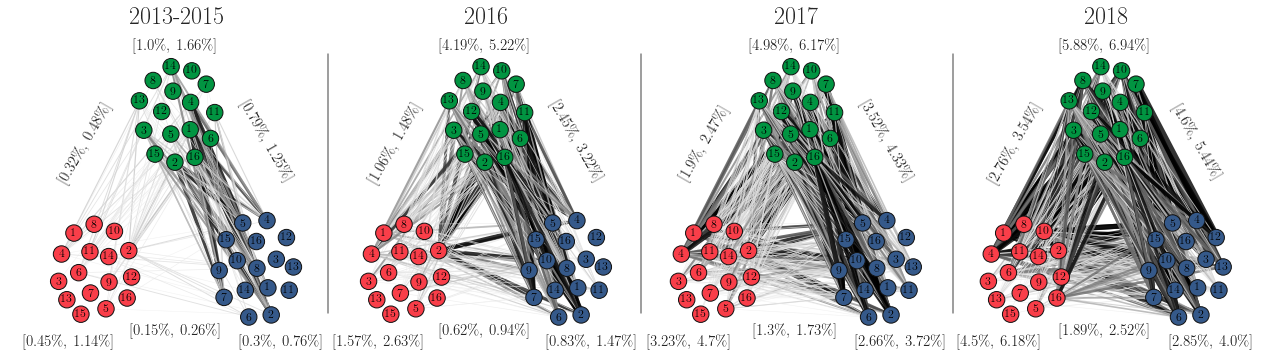

In [188]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure(constrained_layout=False, figsize=(16.5,4.5))
gs = fig.add_gridspec(nrows=3, ncols=4, wspace=0.2, hspace=0, left=0, right=1, top=0.9, bottom=0.05)

for idx, year in enumerate(bins_t_s[1:]):
    print(idx*2,(idx+1)*2)
    ax_graph = fig.add_subplot(gs[0:3, idx])
#     top_k_graph = fig.add_subplot(gs[2, idx])

    G_tmp = nx.Graph()
    G_tmp.add_nodes_from(G.nodes)
    G_tmp.add_edges_from([e for e in  G.edges.data() if e[2]["year"] == year and e[2]["weight"] > 0.01
                         and df_sources.loc[e[0]]["Category"] != df_sources.loc[e[1]]["Category"]])
    edges = G_tmp.edges()
    weights = [np.power(G_tmp[u][v]['weight'],1)*50 for u,v in edges]
    labels = {k: str(n["post"]) for k, n in G.nodes().data()}
    node_color = [ cl.hex2color(colors[df_sources.loc[n]["Category"]]) for n in G.nodes()]
    nodes = nx.draw_networkx_nodes(G_tmp, pos, node_color=node_color, ax=ax_graph, node_size=270)
    nodes.set_edgecolor("#111111")
    edge_color = [plt.get_cmap("Greys")(w/(0.15*25)) for w in weights]
    nodes = nx.draw_networkx_edges(G_tmp, pos, width=weights, ax=ax_graph, 
                                   edge_color=edge_color, alpha=0.8)
    nodes = nx.draw_networkx_labels(G_tmp, pos, labels=labels, ax=ax_graph)

    intervals = { k: dict(v["weight"]) for k, v in
                 df_sims[df_sims.year == year].groupby("kind").agg(mean_confidence_interval).iterrows()}
    
    ax_graph.text(0, -1400, "[{}\%, {}\%]".format(round(intervals["Alt-right I.D.W."]["lower"]*100,2),
                                                round(intervals["Alt-right I.D.W."]["upper"]*100,2)), 
                  horizontalalignment="center",  verticalalignment="center", fontsize=15)
    
    ax_graph.text(-1150, 450, "[{}\%, {}\%]".format(round(intervals["Alt-lite Alt-right"]["lower"]*100,2),
                                                round(intervals["Alt-lite Alt-right"]["upper"]*100,2)), 
                  horizontalalignment="center",  verticalalignment="center", fontsize=15, rotation=60)
    ax_graph.text(1150, 450, "[{}\%, {}\%]".format(round(intervals["Alt-lite I.D.W."]["lower"]*100,2),
                                                round(intervals["Alt-lite I.D.W."]["upper"]*100,2)), 
                  horizontalalignment="center",  verticalalignment="center", fontsize=15, rotation=300)
    
        
    ax_graph.text(0, 1400, "[{}\%, {}\%]".format(round(intervals["Alt-lite Alt-lite"]["lower"]*100,2),
                                                round(intervals["Alt-lite Alt-lite"]["upper"]*100,2)), 
                  horizontalalignment="center",  verticalalignment="center", fontsize=15)
    
    
    ax_graph.text(-1350, -1500, "[{}\%, {}\%]".format(round(intervals["I.D.W. I.D.W."]["lower"]*100,2),
                                            round(intervals["I.D.W. I.D.W."]["upper"]*100,2)), 
              horizontalalignment="center",  verticalalignment="center", fontsize=15)
        
    ax_graph.text(1350, -1500, "[{}\%, {}\%]".format(round(intervals["Alt-right Alt-right"]["lower"]*100,2),
                                            round(intervals["Alt-right Alt-right"]["upper"]*100,2)), 
              horizontalalignment="center",  verticalalignment="center", fontsize=15)
    
    ax_graph.set_axis_off()
    ax_graph.set_title(year, fontsize=24, pad=30)
    k = 10
    top_k = df_sims[(df_sims.nar != None) & (df_sims.year == year)].groupby("nar")\
                .mean().sort_values(by="weight", ascending=False).head(k)
    
#     top_k_graph.set_ylim([0, 1])
#     top_k_graph.set_xlim([0, 1])
#     top_k_graph.set_axis_off()

#     for idx, (name, weight) in enumerate(top_k.iterrows()):
# #         top_k_graph.plot([0.1, 0.9], [.9, .9], color="black")
#         top_k_graph.text(0.3, 0.9 -(idx+1)*0.087, "{}:".format(name),
#                       horizontalalignment="left",  verticalalignment="center", fontsize=9, weight=100)
#         top_k_graph.scatter([0.2], [0.9 -(idx+1)*0.087], s=40, color=colors[df_sources.loc[name,"Category"]],
#                         alpha=0.9, edgecolor="#111111")
#         top_k_graph.text(0.15, 0.9 -(idx+1)*0.087, "{}".format(df_helper_imp.loc[name,"pos"]), color="black",
#                       horizontalalignment="center",  verticalalignment="center", fontsize=10, fontweight=800)
#         top_k_graph.text(0.9, 0.9 -(idx+1)*0.087, "{}\%".format(round(weight.values[0]*100, 2)),
#                       horizontalalignment="right",  verticalalignment="center", fontsize=10, weight=700)

line = plt.Line2D([0.237,0.237],[0.1,0.9], transform=fig.transFigure, color="grey")
fig.add_artist(line)

line = plt.Line2D([0.5,0.5],[0.1,0.9], transform=fig.transFigure, color="grey")
fig.add_artist(line)

line = plt.Line2D([0.763,0.763],[0.1,0.9], transform=fig.transFigure, color="grey")
fig.add_artist(line)

fig.savefig("../imgs/graph_val.pdf", bbox_inches='tight')